## Import Libraries

In [13]:
# import pandas for data wrangling
import pandas as pd
pd.set_option('display.max_columns', None)
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
# import Encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# import SVC model
from sklearn.svm import SVC
# import evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import permutation importance
from sklearn.inspection import permutation_importance


## Load Datasets

In [14]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Understanding

- RowNumber: Index of the row.
- CustomerId: Unique identifier for each customer.
- Surname: Customer's last name (may not be very useful for analysis).
- CreditScore: The credit score of the customer [300 : 850].
  - Poor credit: 300 to 579.
  - Fair credit: 580 to 669.
  - Good credit: 670 to 739.
  - Very good credit: 740 to 799.
  - Excellent credit: 800 to 850.
- Geography: Country of the customer (e.g., France, Spain).
- Gender: Gender of the customer (e.g., Male, Female).
- Age: Age of the customer.
- Tenure: Number of years the customer has been with the bank.
- Balance: Account balance of the customer.
- NumOfProducts: Number of products the customer has purchased.
- HasCrCard: Whether the customer has a credit card (1 = Yes, 0 = No).
- IsActiveMember: Whether the customer is an active member (1 = Yes, 0 = No).
- EstimatedSalary: Estimated annual salary of the customer.
- Exited: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

### Objectives

1. Predict is the customer potentially will churn?
2. Find why they are churning!
3. Giving Recommendation

## Data Wrangling

### Missing Values and Duplicates

In [15]:
# Drop Unsused Column
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [16]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Data Split

In [19]:
# Feature and Target Split
X = df.drop(["Exited"], axis=1)
y = df["Exited"]

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

In [20]:
df = pd.concat([X_train, y_train],axis=1)

## Exploratory Data Analysis
**Analisa beberapa pertanyaan berikut berdasarkan data yang diberikan:**
1. Distribusi Credit Score?
2. Customer Profiling (Age, Geography, Gender)
3. Hubungan Exited dengan Features Categorical
4. Apakah Customer active cenderung tidak churn?
5. APakah Tenure berpengaruh terhadap Churn?

### Churn distribution

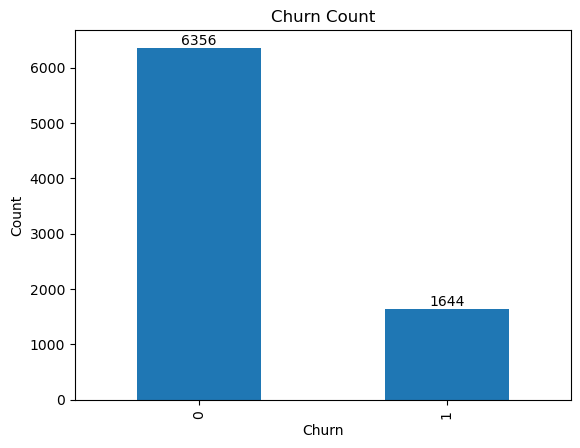

In [21]:
# Target distribution bar chart
ax = df['Exited'].value_counts().plot(kind='bar')

# Set labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn Count')

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

In [22]:
df["Exited"].value_counts()/len(df)

Exited
0    0.7945
1    0.2055
Name: count, dtype: float64

We have an Imbalance Data! 79% Existing Customer vs 21% Churn. We'll see if we need to balance this data

### Credit Score Distribution

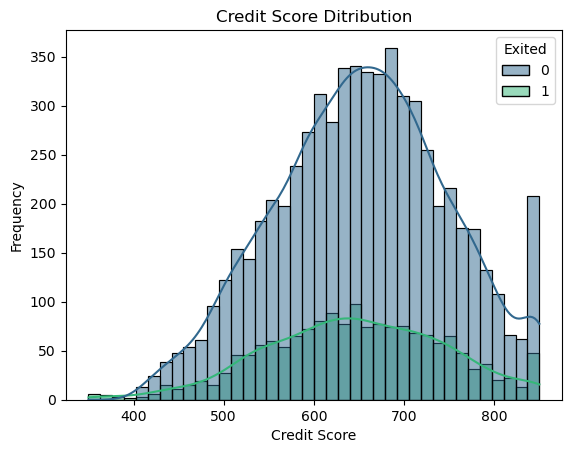

In [23]:
sns.histplot(x='CreditScore', data=df, kde=True, hue="Exited",  palette="viridis")
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Credit Score Ditribution')
plt.show()

It has a little bit Right-skewed Distribution. The distribution is quite same Churn and Existing Customer

### Churn Correlation with other Features

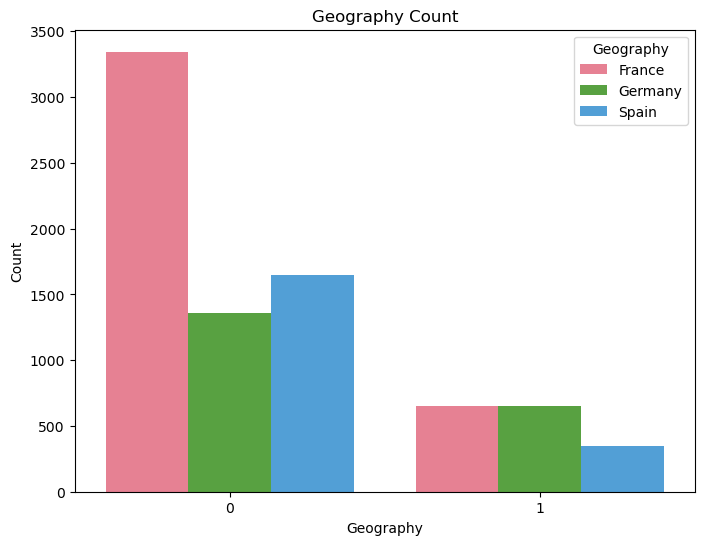

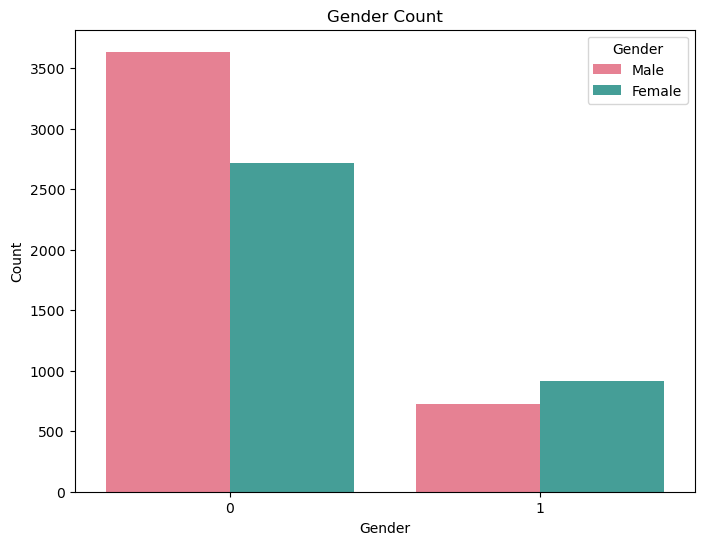

In [24]:
# Categorical Column Distribution
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Exited', hue=col, data=df, palette="husl")
    
    # Set labels dan title
    plt.xlabel(col) 
    plt.ylabel('Count')
    plt.title(f'{col} Count')
    
    plt.show()

Insights :
1. France adalah tempat Customer kita paling banyak
2. Customer dari German memiliki kecenderungan Churn yang lebih tinggi, berkebalikan dari France
3. Female lebih cenderung untuk Churn

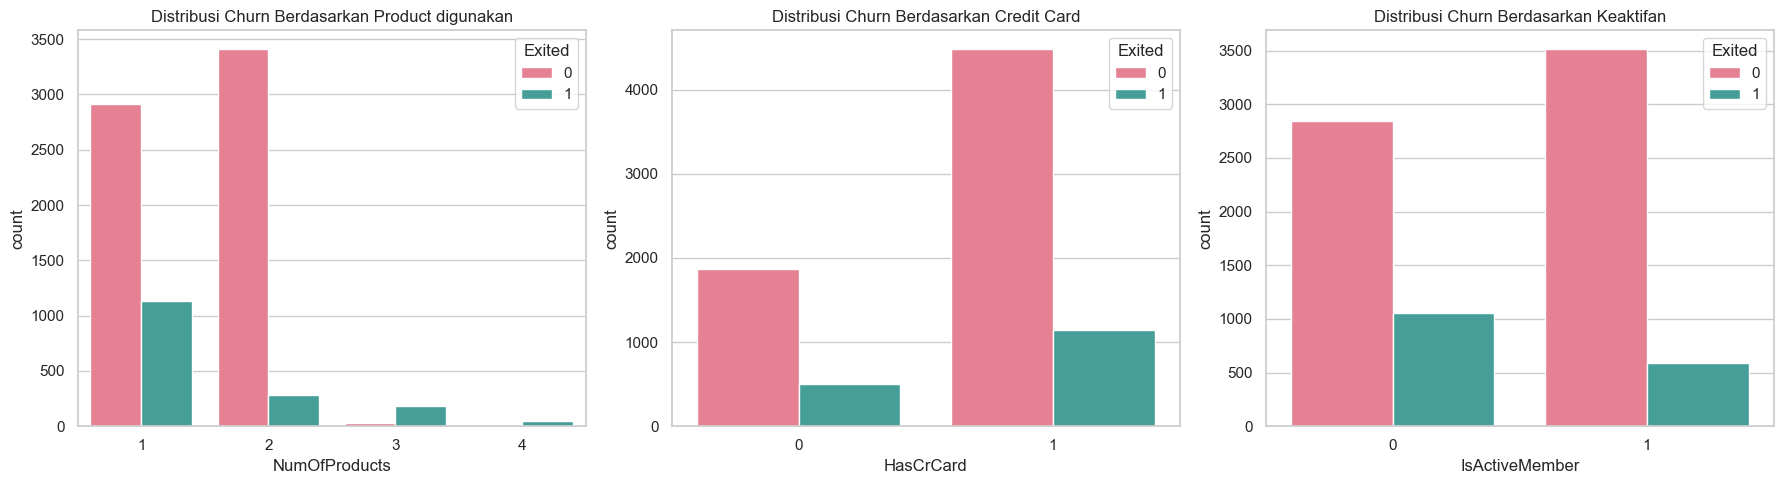

In [ ]:
# Setting style untuk seaborn
sns.set(style="whitegrid")

# Plot hubungan antara 'Exited' dan 'Balance'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='NumOfProducts', hue="Exited", data=df, palette="husl")
plt.title('Distribusi Churn Berdasarkan Product dibeli')

# Plot hubungan antara 'Exited' dan 'Tenure'
plt.subplot(1, 3, 2)
sns.countplot(x='HasCrCard', hue="Exited", data=df,  palette="husl")
plt.title('Distribusi Churn Berdasarkan Credit Card')

# Plot hubungan antara 'Exited' dan 'CreditScore'
plt.subplot(1, 3, 3)
sns.countplot(x='IsActiveMember', hue="Exited", data=df, palette="husl")
plt.title('Distribusi Churn Berdasarkan Keaktifan')

plt.tight_layout()
plt.show()

Insight :
1. Semakin bertambah product yang dibeli semakin resisten.
2. Yang memiliki credit card lebih banyak yang churn, karena secara proporsi mungkin lebih besar juga.
3. Member tidak aktif cenderung lebih mudah Churn.

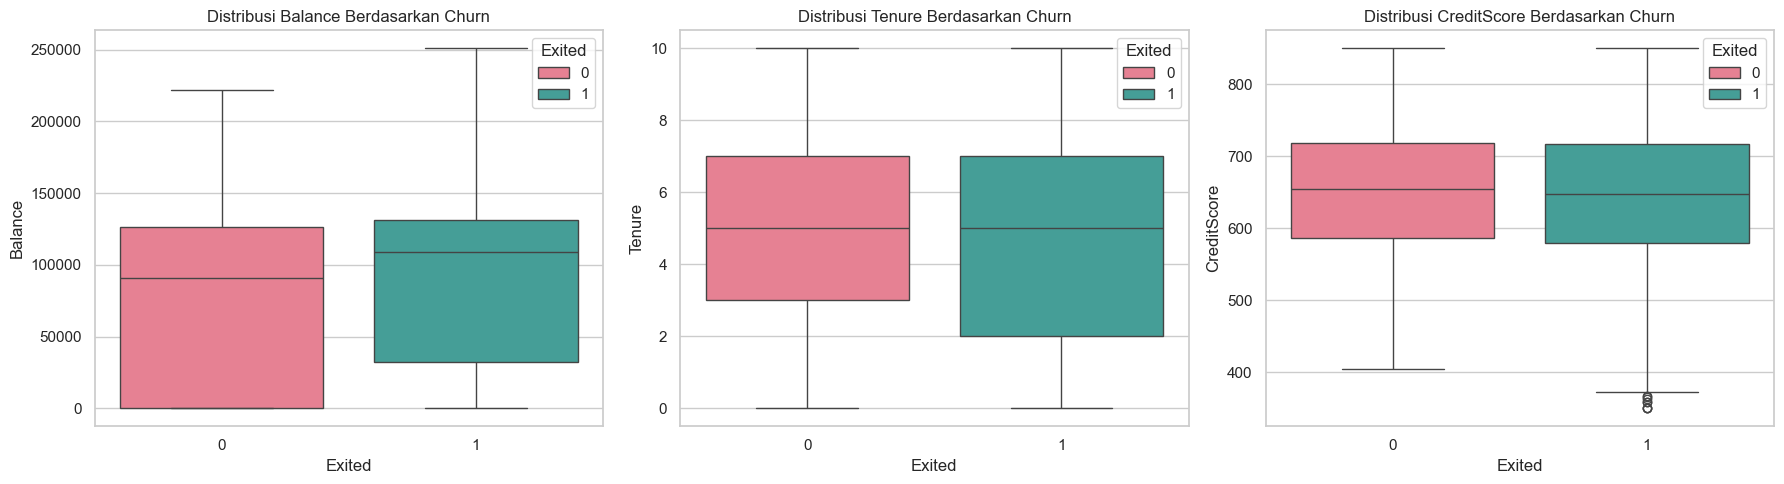

In [26]:

sns.set(style="whitegrid")

# Plot hubungan antara 'Exited' dan 'Balance'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Exited', y='Balance', data=df, hue="Exited", palette="husl")
plt.title('Distribusi Balance Berdasarkan Churn')

# Plot hubungan antara 'Exited' dan 'Tenure'
plt.subplot(1, 3, 2)
sns.boxplot(x='Exited', y='Tenure', data=df, hue="Exited", palette="husl")
plt.title('Distribusi Tenure Berdasarkan Churn')

# Plot hubungan antara 'Exited' dan 'CreditScore'
plt.subplot(1, 3, 3)
sns.boxplot(x='Exited', y='CreditScore', data=df, hue="Exited", palette="husl")
plt.title('Distribusi CreditScore Berdasarkan Churn')

plt.tight_layout()
plt.show()

Agak unik karena saldo 0 cenderung tidak churn. Mungkin hanya menjadi tidak aktif, perlu di telusuri lebih lanjut karena akan menjadi ghost member

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Geography        8000 non-null   object 
 2   Gender           8000 non-null   object 
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 750.0+ KB


### Handling Outliers

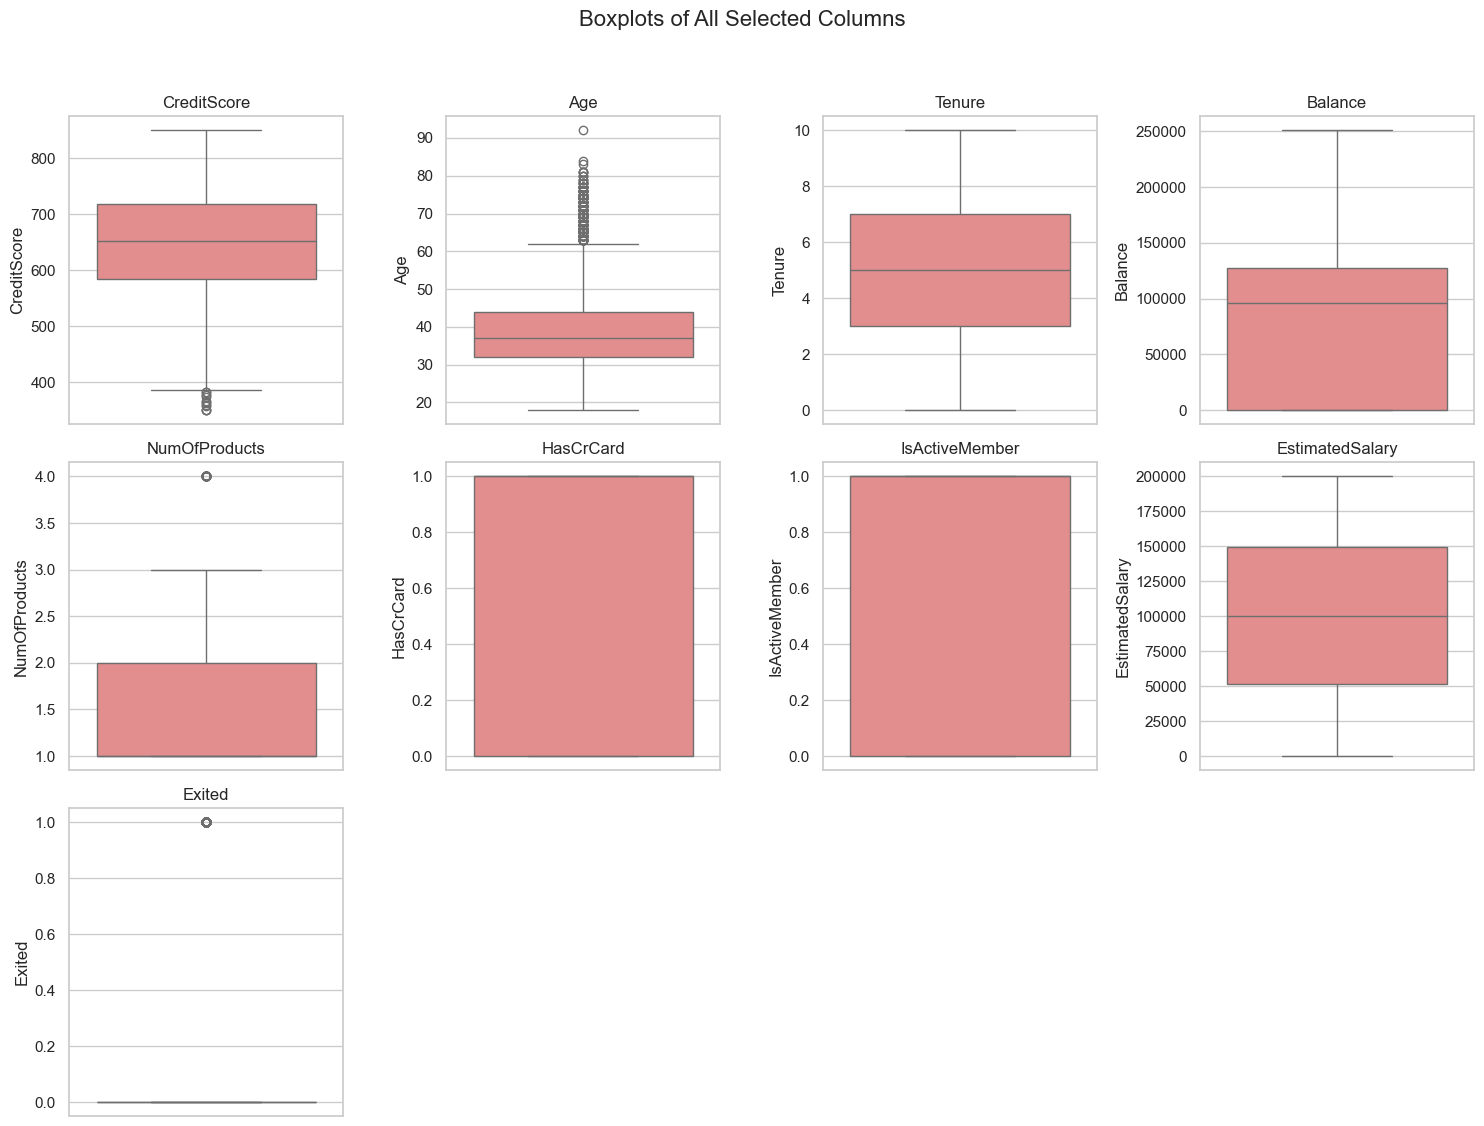

In [28]:
columns = df.select_dtypes(exclude ='object').columns
# Setting up the figure size and grid
plt.figure(figsize=(15, 15))
plt.suptitle("Boxplots of All Selected Columns", fontsize=16)

# Loop through the columns and plot each one as a boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(4, 4, i)  # 4x4 grid, adjust if you need a different layout
    sns.boxplot(y=df[col], color='#F08080')
    plt.title(col)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()

Age has so much outliers and it has a negative impact to our models, so we have to handle it.

In [29]:
df["Age"] = np.log1p(df["Age"])

<Axes: ylabel='Age'>

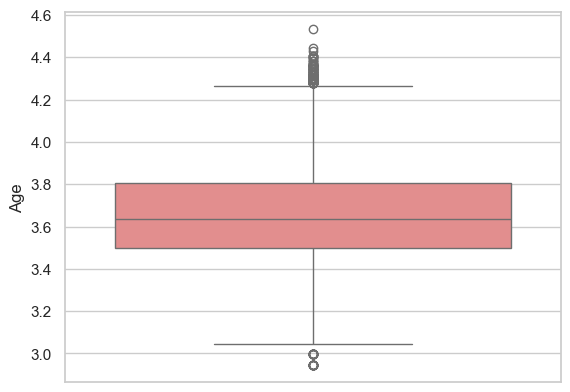

In [30]:
sns.boxplot(y=df["Age"], color='#F08080')

better

## Encoding

In [32]:
# One Hot Encoding 
Geography = pd.get_dummies(X_train['Geography'],prefix='Geography')

Geography = Geography.astype(int)

In [33]:
X_train = pd.concat([X_train, Geography], axis=1)

X_train.drop(columns="Geography", inplace=True)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,Male,32,6,0.00,2,1,1,179093.26,1,0,0
1561,632,Male,42,4,119624.60,2,1,1,195978.86,0,1,0
1670,559,Male,24,3,114739.92,1,1,0,85891.02,0,0,1
6087,561,Female,27,9,135637.00,1,1,0,153080.40,1,0,0
6669,517,Male,56,9,142147.32,1,0,0,39488.04,1,0,0


In [34]:
# One Hot Encoding 
Geography = pd.get_dummies(X_test['Geography'],prefix='Geography')

Geography = Geography.astype(int)

In [35]:
X_test = pd.concat([X_test, Geography], axis=1)

X_test.drop(columns="Geography", inplace=True)
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
6252,596,Male,32,3,96709.07,2,0,0,41788.37,0,1,0
4684,623,Male,43,1,0.00,2,1,1,146379.30,1,0,0
1731,601,Female,44,4,0.00,2,1,0,58561.31,0,0,1
4742,506,Male,59,8,119152.10,2,1,1,170679.74,0,1,0
4521,560,Female,27,7,124995.98,1,1,1,114669.79,0,0,1


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Gender             8000 non-null   object 
 2   Age                8000 non-null   int64  
 3   Tenure             8000 non-null   int64  
 4   Balance            8000 non-null   float64
 5   NumOfProducts      8000 non-null   int64  
 6   HasCrCard          8000 non-null   int64  
 7   IsActiveMember     8000 non-null   int64  
 8   EstimatedSalary    8000 non-null   float64
 9   Geography_France   8000 non-null   int32  
 10  Geography_Germany  8000 non-null   int32  
 11  Geography_Spain    8000 non-null   int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 718.8+ KB


In [37]:
# Label Encoding
le = LabelEncoder()

# Apply label encoding to each categorical column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.fit_transform(X_test['Gender'])

In [38]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,1,0,0
1561,632,1,42,4,119624.60,2,1,1,195978.86,0,1,0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0,0,1
6087,561,0,27,9,135637.00,1,1,0,153080.40,1,0,0
6669,517,1,56,9,142147.32,1,0,0,39488.04,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1,0,0
5191,682,0,58,1,0.00,1,1,1,706.50,1,0,0
5390,735,0,38,1,0.00,3,0,0,92220.12,1,0,0
860,667,1,43,8,190227.46,1,1,0,97508.04,1,0,0


## Feature Scaling

In [39]:
feature = list(X_train)

In [40]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler pada data training dan transformasikan data training
X_train_scaled = scaler.fit_transform(X_train)

# Transformasikan data testing menggunakan scaler yang sudah di-fit
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train = pd.DataFrame(data = X_train_scaled, columns = feature)
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.356500,0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,1.001501,-0.579467,-0.576388
1,-0.203898,0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.998501,1.725723,-0.576388
2,-0.961472,0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.998501,-0.579467,1.734942
3,-0.940717,-1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.001501,-0.579467,-0.576388
4,-1.397337,0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.001501,-0.579467,-0.576388


In [42]:
X_test = pd.DataFrame(data = X_test_scaled, columns = feature)
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.577496,0.913248,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.998501,1.725723,-0.576388
1,-0.297297,0.913248,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,1.001501,-0.579467,-0.576388
2,-0.525607,-1.094993,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.998501,-0.579467,1.734942
3,-1.511492,0.913248,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.998501,1.725723,-0.576388
4,-0.951094,-1.094993,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.998501,-0.579467,1.734942


In [31]:
'''from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resampling data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas sebelum dan sesudah
print("Distribusi kelas sebelum SMOTE:", pd.Series(y_train).value_counts())
print("Distribusi kelas setelah SMOTE:", pd.Series(y_resampled).value_counts())'''


'from imblearn.over_sampling import SMOTE\n\n# Inisialisasi SMOTE\nsmote = SMOTE(random_state=42)\n\n# Resampling data\nX_resampled, y_resampled = smote.fit_resample(X_train, y_train)\n\n# Menampilkan distribusi kelas sebelum dan sesudah\nprint("Distribusi kelas sebelum SMOTE:", pd.Series(y_train).value_counts())\nprint("Distribusi kelas setelah SMOTE:", pd.Series(y_resampled).value_counts())'

## Modeling (SVM)

In [107]:
# Create base SVM model
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

### Evaluation

In [108]:
x_pred = svm.predict(X_train)

print("Accuracy:", accuracy_score(y_train, x_pred))
print(classification_report(y_train, x_pred))

Accuracy: 0.815375
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      6356
           1       0.53      0.80      0.64      1644

    accuracy                           0.82      8000
   macro avg       0.74      0.81      0.76      8000
weighted avg       0.86      0.82      0.83      8000



In [109]:
# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate base model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



This model is quite good to predict Churn. According to Recall score, but it seems our model is overfit

Confusion Matrix:
 [[1273  334]
 [  96  297]]


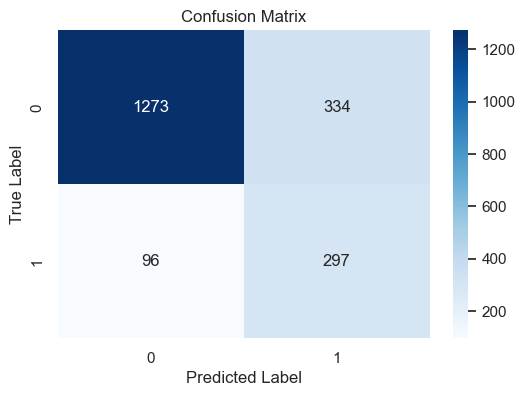

In [110]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Feature Importance

Permutation Feature Importances for Non-Linear SVM:
               feature  importance
5       NumOfProducts    0.152690
2                 Age    0.110421
7      IsActiveMember    0.030198
4             Balance    0.029880
10  Geography_Germany    0.021868
1              Gender    0.009356
8     EstimatedSalary    0.006096
11    Geography_Spain    0.005474
3              Tenure    0.004148
9    Geography_France    0.003796
0         CreditScore    0.003729
6           HasCrCard   -0.009881


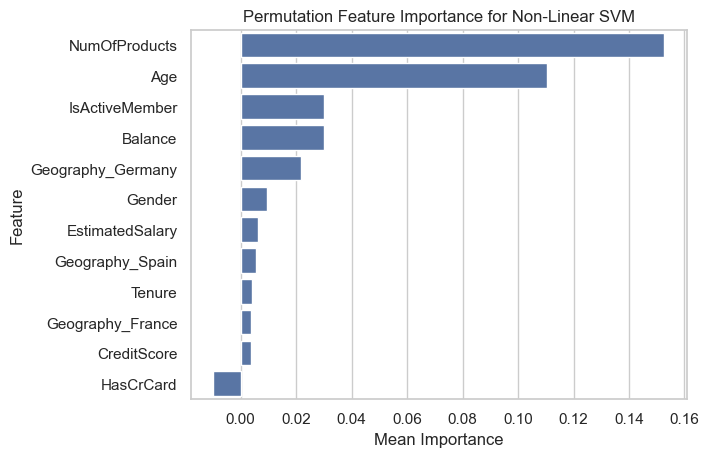

In [48]:
perm_importance = permutation_importance(svm, X_test, y_test, scoring='f1')
   # Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': perm_importance.importances_mean
   }).sort_values(by='importance', ascending=False)
print("Permutation Feature Importances for Non-Linear SVM:\n", feature_importance_df)
# Plot the permutation importance
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Permutation Feature Importance for Non-Linear SVM")
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.show()

5 Fitur yang menjadi penentu seseorang akan churn atau tidak.
1. Jumlah Product yang dibeli (means, more purchase more sustain)
2. Usia
3. Saldo, namun ini tidak terlalu signifikan seperti 2 diatas
4. Member aktif atau tidak juga tinggi, namun tidak signifikan
5. German people

Before we continuing, we gonna try to make the model even better.

### Hyperparameter Tuning

In [58]:
# Define the parameter grid
param_grid = {
    'C': [1, 2, 5, 10]
}

In [59]:
# Grid Search with Cross Validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [1, 2, 5, 10]},
             scoring='f1_weighted')

In [57]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best f1 score: ", grid_search.best_score_)

Best parameters found:  {'C': 10}
Best f1 score:  0.8389831567142435


In [63]:
# Use the best model for predictions
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Evaluate base model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Accuracy: 0.8645
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



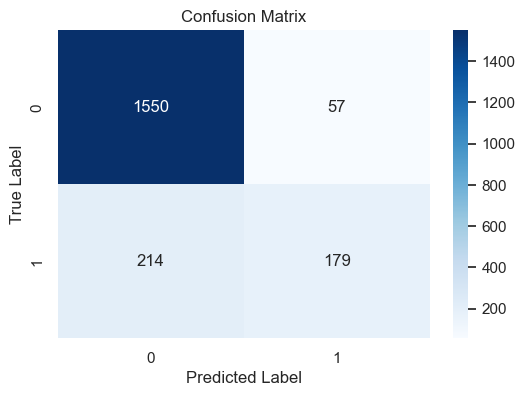

In [64]:
# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Okay, enough. The Baseline model is good enough. Let's continue

## Balancing Data

In [80]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Resampling data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas sebelum dan sesudah
print("Distribusi kelas sebelum SMOTE:", pd.Series(y_train).value_counts())
print("Distribusi kelas setelah SMOTE:", pd.Series(y_resampled).value_counts())

Distribusi kelas sebelum SMOTE: Exited
0    6356
1    1644
Name: count, dtype: int64
Distribusi kelas setelah SMOTE: Exited
0    6356
1    6356
Name: count, dtype: int64


In [87]:
# Create base SVM model
svm = SVC()
svm.fit(X_resampled, y_resampled)

SVC()

In [88]:
# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate base model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.782
              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1607
           1       0.46      0.72      0.56       393

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



Worse

## Modeling (Other Model)

In [77]:
%pip install scipy==1.11.4
%pip install dalex
%pip install scikit-plot
%pip install shap
%pip install lime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [96]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import tree module
from sklearn import tree
# import xgboost classifier
from xgboost import XGBClassifier

# import metrics method for model evaluation
import sklearn.metrics as metrics

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [79]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 42,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# define random forest model with balance data
random_forest_clf_balance = RandomForestClassifier(
    random_state = 42,
    n_estimators=100
)
# fit model to training data
random_forest_clf_balance.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# define XGBoost model
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [ ]:
# define XGBoost model with balanced data
xgb_clf_balance = XGBClassifier(
    random_state = 1000
)

xgb_clf_balance.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

In [95]:
# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

# random forest prediction
rf_pred_balance = random_forest_clf_balance.predict(X_test)
rf_pred_proba_balance = random_forest_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred_balance = xgb_clf_balance.predict(X_test)
xgb_pred_proba_balance = xgb_clf.predict_proba(X_test)

In [97]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.88,0.76,0.87,0.82,0.86
recall,0.96,0.47,0.87,0.72,0.87
f1-score,0.92,0.58,0.87,0.75,0.85
support,1607.00,393.00,0.87,2000.00,2000.00


In [98]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred_balance, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.90,0.59,0.84,0.74,0.84
recall,0.90,0.59,0.84,0.75,0.84
f1-score,0.90,0.59,0.84,0.75,0.84
support,1607.00,393.00,0.84,2000.00,2000.00


In [99]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred_balance, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.90,0.65,0.85,0.77,0.85
recall,0.93,0.56,0.85,0.74,0.85
f1-score,0.91,0.60,0.85,0.76,0.85
support,1607.00,393.00,0.85,2000.00,2000.00


In [100]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.89,0.71,0.86,0.80,0.85
recall,0.95,0.51,0.86,0.73,0.86
f1-score,0.92,0.59,0.86,0.76,0.85
support,1607.00,393.00,0.86,2000.00,2000.00


Nothing better, so we gonna continue with SVM Baseline model

## explanatory model analysis

In [111]:
# Create base SVM model
svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

In [112]:
x_pred = svm.predict(X_train)

print("Accuracy:", accuracy_score(y_train, x_pred))
print(classification_report(y_train, x_pred))

Accuracy: 0.815375
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      6356
           1       0.53      0.80      0.64      1644

    accuracy                           0.82      8000
   macro avg       0.74      0.81      0.76      8000
weighted avg       0.86      0.82      0.83      8000



Confusion Matrix:
 [[1273  334]
 [  96  297]]


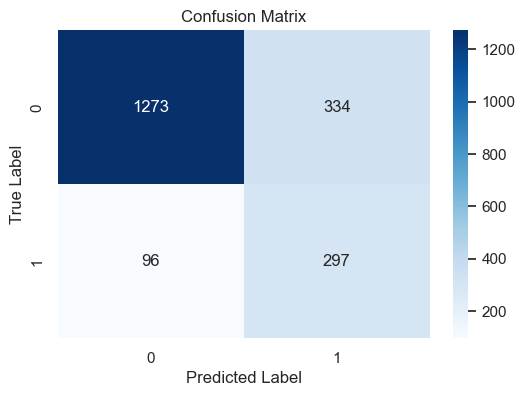

In [113]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [116]:
svm_exp = dx.Explainer(svm, X_train, y_train, label = "SVM Baseline Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8000 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8000 values
  -> model_class       : sklearn.svm._classes.SVC (default)
  -> label             : SVM Baseline Interpretation
  -> predict function  : <function yhat_default at 0x0000019B194E7EC0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.306, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.101, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [117]:
svm_exp.model_parts().plot()

In [118]:
svm_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 12/12 [03:48<00:00, 19.06s/it]


## Summary

Dari EDA dan Modeling, kita bisa membuktikan bahwa beberapa hal yang cenderung mengarahkan kepada churn ternyata valid. Diantaranya :
1. Jumlah Product yang dibeli = Pelanggan dengan kurang dari 2 produk sangat besar kemungkinan churn!
2. Usia = Usia 30-50 tahun cenderung churn!
3. Balance = Pelanggan dengan saldo sangat rendah atau tinggi cenderung churn lebih tinggi.
4. Member Aktif = pelanggan tidak aktif cenderung churn
5. Penduduk Jerman = penduduk jerman cenderung churn

Rekomendasi kami :
1. Mungkin produk kita menarik, namun orang malas mencari tahu lebih. Evaluasi produk yang kita miliki, berikan promo berkelanjutan seperti "dapatkan potongan harga 20% untuk program cicil emas bagi pengguna credit card kami" atau berikan insentif diskon.
2. Tinjau kebijakan layanan atau produk yang ditawarkan di Jerman, dan berikan perhatian khusus untuk pelanggan di sana seperti berikan promosi lebih sesuai dengan tren yang berkembang.
3. Berikan penawaran khusus Fokus kepada kelompok usia 30-50, seperti paket investasi jangka panjang atau layanan finansial keluarga atau KPR rumah dengan bunga lebih rendah.
4. Berikan program loyalitas untuk pelanggan dengan saldo tinggi dan edukasi pengelolaan keuangan untuk pelanggan dengan saldo rendah.
5. Tingkatkan engagement pelanggan dengan komunikasi rutin atau fitur interaktif seperti aplikasi mobile banking.